In [ ]:
%pip install tensorflow_datasets matplotlib keras_nlp

In [1]:
import io
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [16]:
with open("/Users/aditya/Downloads/BBCNewsTrain.csv", 'r') as csvfile:
    print(f"First line (header) looks like this:\n\n{csvfile.readline()}")
    print(f"The second line (first data point) looks like this:\n\n{csvfile.readline()}")

First line (header) looks like this:

ArticleId,Text,Category

The second line (first data point) looks like this:

1833,worldcom ex-boss launches defence lawyers defending former worldcom chief bernie ebbers against a battery of fraud charges have called a company whistleblower as their first witness.  cynthia cooper  worldcom s ex-head of internal accounting  alerted directors to irregular accounting practices at the us telecoms giant in 2002. her warnings led to the collapse of the firm following the discovery of an $11bn (£5.7bn) accounting fraud. mr ebbers has pleaded not guilty to charges of fraud and conspiracy.  prosecution lawyers have argued that mr ebbers orchestrated a series of accounting tricks at worldcom  ordering employees to hide expenses and inflate revenues to meet wall street earnings estimates. but ms cooper  who now runs her own consulting business  told a jury in new york on wednesday that external auditors arthur andersen had approved worldcom s accounting in e

In [5]:
VOCAB_SIZE = 1000
EMBEDDING_DIM = 16
MAX_LENGTH = 120
TRAINING_SPLIT = 0.8

In [18]:
data_dir = "/Users/aditya/Downloads/BBCNewsTrain.csv"
data = np.loadtxt(data_dir, delimiter=',', skiprows=1, usecols=(1,2), dtype='str', comments=None)
print(f"Shape of the data: {data.shape}")
print(f"{data[0]}\n{data[1]}")

Shape of the data: (1490, 2)
['worldcom ex-boss launches defence lawyers defending former worldcom chief bernie ebbers against a battery of fraud charges have called a company whistleblower as their first witness.  cynthia cooper  worldcom s ex-head of internal accounting  alerted directors to irregular accounting practices at the us telecoms giant in 2002. her warnings led to the collapse of the firm following the discovery of an $11bn (£5.7bn) accounting fraud. mr ebbers has pleaded not guilty to charges of fraud and conspiracy.  prosecution lawyers have argued that mr ebbers orchestrated a series of accounting tricks at worldcom  ordering employees to hide expenses and inflate revenues to meet wall street earnings estimates. but ms cooper  who now runs her own consulting business  told a jury in new york on wednesday that external auditors arthur andersen had approved worldcom s accounting in early 2001 and 2002. she said andersen had given a  green light  to the procedures and prac

In [20]:
# Test the function
print(f"There are {len(data)} sentence-label pairs in the dataset.\n")
print(f"First sentence has {len((data[0,0]).split())} words.\n")
print(f"The first 5 labels are {data[:5,1]}")

There are 1490 sentence-label pairs in the dataset.

First sentence has 301 words.

The first 5 labels are ['business' 'business' 'business' 'tech' 'business']


In [26]:
# GRADED FUNCTIONS: train_val_datasets
def train_val_datasets(data):
    '''
    Splits data into traning and validations sets
    
    Args:
        data (np.array): array with two columns, first one is the label, the second is the text
    
    Returns:
        (tf.data.Dataset, tf.data.Dataset): tuple containing the train and validation datasets
    '''
    ### START CODE HERE ###

    # Compute the number of sentences that will be used for training (should be an integer)
    train_size = len(data)

    # Slice the dataset to get only the texts. Remember that texts are on the second column
    texts = data[:,0]
    # Slice the dataset to get only the labels. Remember that labels are on the first column
    labels = data[:,1]
    # Split the sentences and labels into train/validation splits. Write your own code below
    split = int(0.8 * train_size)
    train_texts = texts[:split]
    validation_texts = texts[split:]
    train_labels = labels[:split]
    validation_labels = labels[split:]
    
    # create the train and validation datasets from the splits
    train_dataset = tf.data.Dataset.from_tensor_slices((train_texts, train_labels))
    validation_dataset = tf.data.Dataset.from_tensor_slices((validation_texts, validation_labels))
    
	### END CODE HERE ### 
    
    return train_dataset, validation_dataset

In [27]:
# Create the datasets
train_dataset, validation_dataset = train_val_datasets(data)

print(f"There are {train_dataset.cardinality()} sentence-label pairs for training.\n")
print(f"There are {validation_dataset.cardinality()} sentence-label pairs for validation.\n")

There are 1192 sentence-label pairs for training.

There are 298 sentence-label pairs for validation.



In [28]:
def standardize_func(sentence):
    """
    Removes a list of stopwords
    
    Args:
        sentence (tf.string): sentence to remove the stopwords from
    
    Returns:
        sentence (tf.string): lowercase sentence without the stopwords
    """
    # List of stopwords
    stopwords = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "her", "here",  "hers", "herself", "him", "himself", "his", "how",  "i", "if", "in", "into", "is", "it", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she",  "should", "so", "some", "such", "than", "that",  "the", "their", "theirs", "them", "themselves", "then", "there", "these", "they", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we",  "were", "what",  "when", "where", "which", "while", "who", "whom", "why", "why", "with", "would", "you",  "your", "yours", "yourself", "yourselves", "'m",  "'d", "'ll", "'re", "'ve", "'s", "'d"]
 
    # Sentence converted to lowercase-only
    sentence = tf.strings.lower(sentence)
    
    # Remove stopwords
    for word in stopwords:
        if word[0] == "'":
            sentence = tf.strings.regex_replace(sentence, rf"{word}\b", "")
        else:
            sentence = tf.strings.regex_replace(sentence, rf"\b{word}\b", "")
    
    # Remove punctuation
    sentence = tf.strings.regex_replace(sentence, r'[!"#$%&()\*\+,-\./:;<=>?@\[\\\]^_`{|}~\']', "")


    return sentence

In [29]:
test_sentence = "Hello! We're just about to see this function in action =)"
standardized_sentence = standardize_func(test_sentence)
print(f"Original sentence is:\n{test_sentence}\n\nAfter standardizing:\n{standardized_sentence}")

Original sentence is:
Hello! We're just about to see this function in action =)

After standardizing:
b'hello  just   see  function  action '


In [30]:
# GRADED FUNCTION: fit_vectorizer
def fit_vectorizer(train_sentences, standardize_func):
    '''
    Defines and adapts the text vectorizer

    Args:
        train_sentences (tf.data.Dataset): sentences from the train dataset to fit the TextVectorization layer
        standardize_func (FunctionType): function to remove stopwords and punctuation, and lowercase texts.
    Returns:
        TextVectorization: adapted instance of TextVectorization layer
    '''
    ### START CODE HERE ###
    
    # Instantiate the TextVectorization class, passing in the correct values for the given parameters below
    vectorizer = tf.keras.layers.TextVectorization( 
		standardize=standardize_func,
		max_tokens=VOCAB_SIZE,
		output_sequence_length=MAX_LENGTH
	) 
    
    # Adapt the vectorizer to the training sentences
    vectorizer.adapt(train_sentences)
	
    ### END CODE HERE ###
    
    return vectorizer

In [31]:
# Create the vectorizer
text_only_dataset = train_dataset.map(lambda text, label: text)
vectorizer = fit_vectorizer(text_only_dataset, standardize_func)
vocab_size = vectorizer.vocabulary_size()

print(f"Vocabulary contains {vocab_size} words\n")

Vocabulary contains 1000 words



In [32]:
# GRADED FUNCTION: fit_label_encoder
def fit_label_encoder(train_labels, validation_labels):
    """Creates an instance of a StringLookup, and trains it on all labels

    Args:
        train_labels (tf.data.Dataset): dataset of train labels
        validation_labels (tf.data.Dataset): dataset of validation labels

    Returns:
        tf.keras.layers.StringLookup: adapted encoder for train and validation labels
    """
    ### START CODE HERE ###
    
    # join the two label datasets
    labels = train_labels.concatenate(validation_labels) #concatenate the two datasets.
    
    # Instantiate the StringLookup layer. Remember that you don't want any OOV tokens
    label_encoder = tf.keras.layers.StringLookup(
        num_oov_indices=0
    )
    
    # Fit the TextVectorization layer on the train_labels
    label_encoder.adapt(labels)
   
    ### END CODE HERE ###
    
    return label_encoder

In [33]:
# Create the label encoder
train_labels_only = train_dataset.map(lambda text, label: label)
validation_labels_only = validation_dataset.map(lambda text, label: label)

label_encoder = fit_label_encoder(train_labels_only,validation_labels_only)
                                  
print(f'Unique labels: {label_encoder.get_vocabulary()}')

Unique labels: ['sport', 'business', 'politics', 'entertainment', 'tech']


2026-02-17 09:04:27.910082: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [34]:
# GRADED FUNCTION: preprocess_dataset
def preprocess_dataset(dataset, text_vectorizer, label_encoder):
    """Apply the preprocessing to a dataset

    Args:
        dataset (tf.data.Dataset): dataset to preprocess
        text_vectorizer (tf.keras.layers.TextVectorization ): text vectorizer
        label_encoder (tf.keras.layers.StringLookup): label encoder

    Returns:
        tf.data.Dataset: transformed dataset
    """
    
    ### START CODE HERE ###

    labels = dataset.map(lambda text, labels : labels)
    text = dataset.map(lambda text, labels : text)

    text = text.map(lambda x : text_vectorizer(x))
    labels = labels.map(lambda x : label_encoder(x))
    
    # Convert the Dataset sentences to sequences, and encode the text labels
    dataset = tf.data.Dataset.zip((text, labels))
    dataset = dataset.batch(32) # Set a batchsize of 32
    
	### END CODE HERE ###
    
    return dataset

In [35]:
# Preprocess your dataset
train_proc_dataset = preprocess_dataset(train_dataset, vectorizer, label_encoder)
validation_proc_dataset = preprocess_dataset(validation_dataset, vectorizer, label_encoder)

print(f"Number of batches in the train dataset: {train_proc_dataset.cardinality()}")
print(f"Number of batches in the validation dataset: {validation_proc_dataset.cardinality()}")

Number of batches in the train dataset: 38
Number of batches in the validation dataset: 10


In [36]:
train_batch = next(train_proc_dataset.as_numpy_iterator())
validation_batch = next(validation_proc_dataset.as_numpy_iterator())

print(f"Shape of the train batch: {train_batch[0].shape}")
print(f"Shape of the validation batch: {validation_batch[0].shape}")

Shape of the train batch: (32, 120)
Shape of the validation batch: (32, 120)


In [37]:
# GRADED FUNCTION: create_model
def create_model():
    """
    Creates a text classifier model
    Returns:
      tf.keras Model: the text classifier model
    """
   
    ### START CODE HERE ###
	
    # Define your model
    model = tf.keras.Sequential([ 
        tf.keras.Input(shape=(MAX_LENGTH,)),
        tf.keras.layers.Embedding(VOCAB_SIZE, EMBEDDING_DIM),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(5, activation='softmax')
    ])
    
    # Compile model. Set an appropriate loss, optimizer and metrics
    model.compile(
		loss='sparse_categorical_crossentropy',
		optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
		metrics=['accuracy'] 
	) 

    ### END CODE HERE ###

    return model

In [38]:
model = create_model()

In [41]:
history = model.fit(train_proc_dataset, epochs=20, validation_data=validation_proc_dataset)

Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5008 - loss: 1.3371 - val_accuracy: 0.4664 - val_loss: 1.3285
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.5612 - loss: 1.2137 - val_accuracy: 0.5336 - val_loss: 1.2035
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6636 - loss: 1.0904 - val_accuracy: 0.6577 - val_loss: 1.0826
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7399 - loss: 0.9764 - val_accuracy: 0.7349 - val_loss: 0.9724
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7911 - loss: 0.8700 - val_accuracy: 0.7852 - val_loss: 0.8719
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8238 - loss: 0.7694 - val_accuracy: 0.8322 - val_loss: 0.7797
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8523 - loss: 0.6757 - val_accuracy: 0.8456 - val_loss: 0.6962
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8683 - loss: 0.5908 - val_accuracy: 0.8591 - v

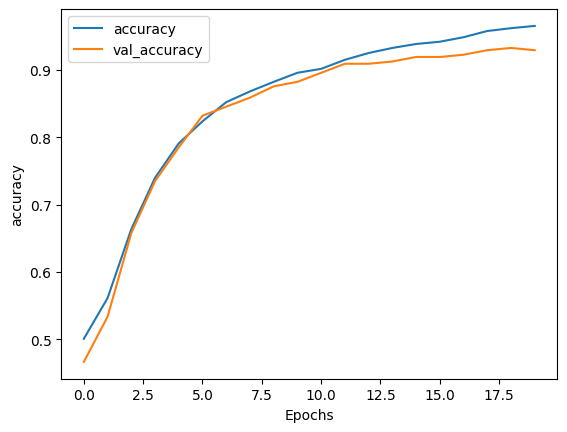

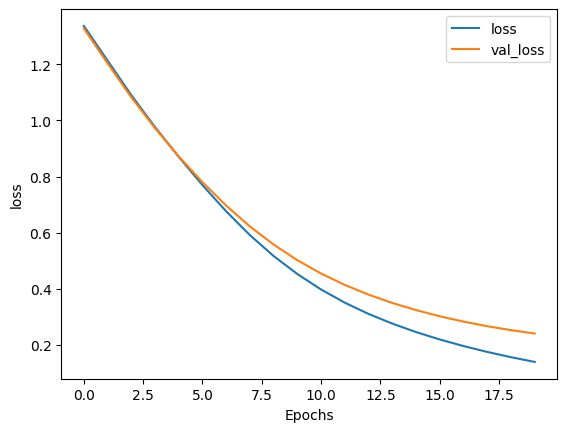

In [42]:
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history[f'val_{metric}'])
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, f'val_{metric}'])
    plt.show()
    
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")